In [18]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

# Load the dataset
df = pd.read_csv(r"C:\Users\H\Downloads\emotion_dataset_2.csv")

In [19]:
# Display some data for verification
print(df.head())

   Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                NaN  
1                     Sage Act upgrade list tommorow  
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3  eye  true hazel eyeand brilliant  Regular feat...  
4    ugh babe hugggzzz u  babe naamazed nga ako e...  


In [20]:
# إحصائيات التصنيفات
print(df['Emotion'].value_counts())

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64


In [21]:
# Clean the text data
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

# Display the cleaned data
print(df.head())

   Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                  ?  
1                    Sage Act upgrade list tommorow.  
2  WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...  
3  eye ! true hazel eye-and brilliant ! Regular f...  
4  ugh babe.. hugggzzz u .! babe naamazed nga ako...  


<Axes: xlabel='Emotion', ylabel='count'>

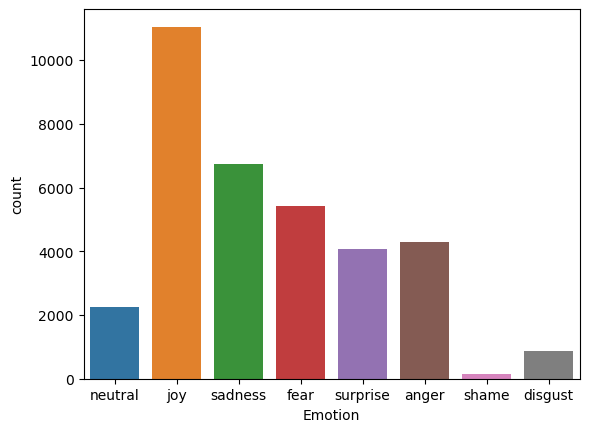

In [22]:
# Plot the distribution of emotions
sns.countplot(x='Emotion', data=df)

In [23]:
# Set up the features and labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=0)

# Build the classification model using Logistic Regression
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

# Train the model
pipe_lr.fit(x_train, y_train)

C:\Users\H\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [24]:
# Evaluate the model
print("Accuracy:", pipe_lr.score(x_test, y_test))

Accuracy: 0.619946349875455


In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Build the MultinomialNB model
pipe_nb = Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

# Train the model
pipe_nb.fit(x_train, y_train)

# Evaluate the model
accuracy_nb = pipe_nb.score(x_test, y_test)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.5745353515999233


<Figure size 1200x1000 with 0 Axes>

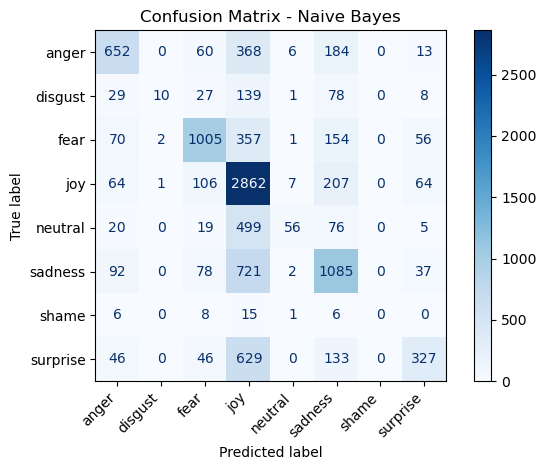

In [38]:
# Compute the confusion matrix
y_pred_nb = pipe_nb.predict(x_test)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=pipe_nb.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 10))  
disp_nb = ConfusionMatrixDisplay(conf_matrix_nb, display_labels=pipe_nb.classes_)
disp_nb.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title('Confusion Matrix - Naive Bayes')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

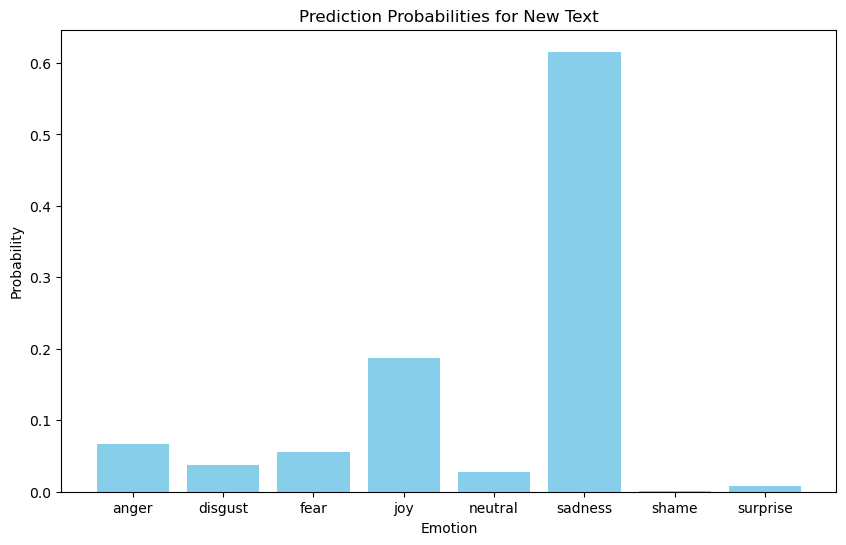

In [35]:
# Compute the prediction probabilities
probs = pipe_lr.predict_proba([ex1])[0]

# Plot the distribution of probabilities
plt.figure(figsize=(10, 6))
plt.bar(pipe_lr.classes_, probs, color='skyblue')
plt.title('Prediction Probabilities for New Text')
plt.xlabel('Emotion')
plt.ylabel('Probability')
plt.show()


In [25]:
# Make a prediction
ex1 = "This book was so interesting it made me happy"
print("Prediction:", pipe_lr.predict([ex1]))
print("Prediction Probability:", pipe_lr.predict_proba([ex1]))

Prediction: ['joy']
Prediction Probability: [[1.60505429e-03 7.06448398e-03 6.95652255e-03 9.43810885e-01
  1.00440590e-04 2.63232198e-02 6.63275846e-05 1.40730667e-02]]


In [29]:
ex2 = "This book was so bad "
print("Prediction:", pipe_lr.predict([ex1]))
print("Prediction Probability:", pipe_lr.predict_proba([ex1]))


Prediction: ['sadness']
Prediction Probability: [[0.06632599 0.03692517 0.05609653 0.1876725  0.02821705 0.6157469
  0.00099907 0.00801679]]


In [26]:
# Save the model
with open("emotion_classifier_pipe_lr_03_june_2021.pkl", "wb") as pipeline_file:
    joblib.dump(pipe_lr, pipeline_file)